16:40:56 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.11.1 / v1.11.1-26-gc27e2f6-dirty)
16:40:56 INFO    opendrift.readers.reader_ROMS_native:148: Opening dataset: /import/VERTMIX/PALAU_2023/ROMS/PALAU_800m/Experiments/AccumulatedData_PALAU_800m_2023/palau_his_2023-06-04.nc
16:40:56 INFO    opendrift.readers.reader_ROMS_native:165: Opening file with Dataset
16:40:57 INFO    opendrift.readers.reader_ROMS_native:246: Read GLS parameters from file.
16:40:57 WARNING opendrift.readers.basereader.structured:50: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by supplying a valid projection to the reader.
16:40:57 INFO    opendrift.readers.basereader.structured:90: Making interpolator for lon,lat to x,y conversion...
16:41:10 INFO    opendrift.models.ba

--------------------
Reader performance:
--------------------
roms native
 0:00:04.1  total
 0:00:00.0  preparing
 0:00:04.0  reading
 0:00:00.1  interpolation
 0:00:00.0  interpolation_time
 0:00:00.0  masking
 0:00:00.0  rotating vectors
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
Performance:
   23.2 total time
   18.6 configuration
    0.0 preparing main loop
      0.0 moving elements to ocean
    4.5 main loop
      0.0 updating elements
    0.0 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.11.1)
	994 active Lagrangian3DArray particles  (6 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  sea_floor_depth_below_sea_level
  x_sea_water_velocity
  y_sea_water_velocity
     1) roms native
  -----
  land_binary_mask
     1) global_landmask
  -----
Readers not added for the following variables:
  ocean_mixed_layer_thickness
  ocean_vert

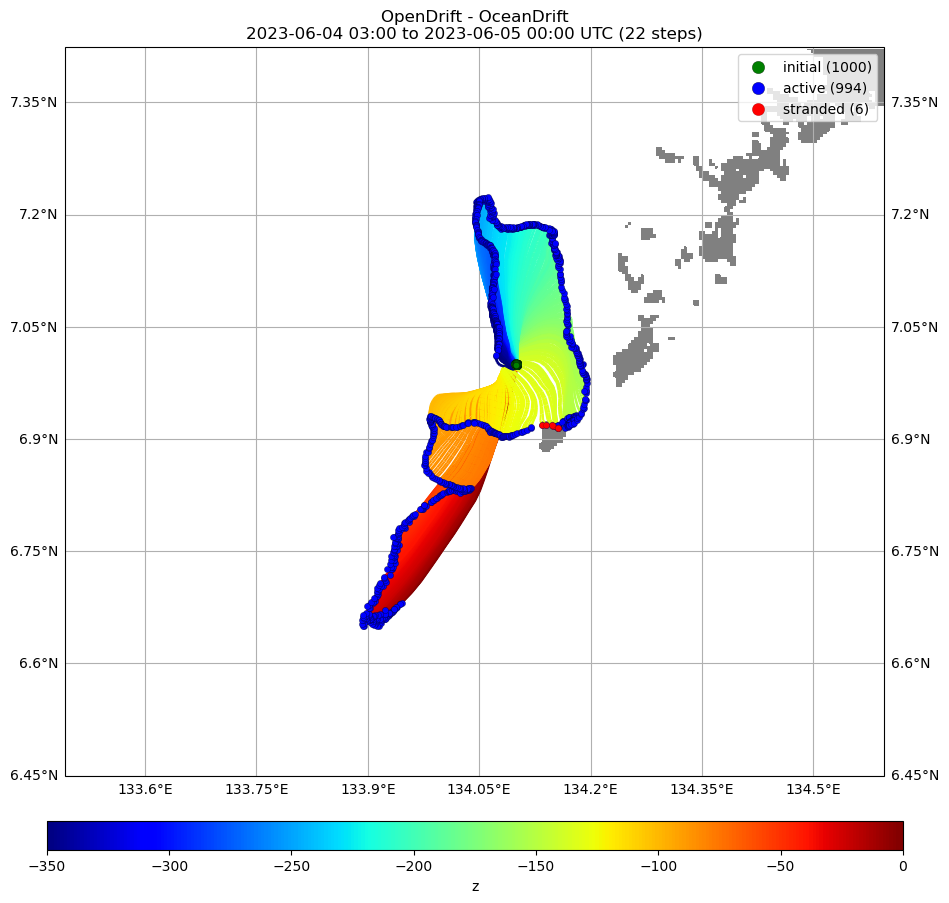

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-06-04 03:00 to 2023-06-05 00:00 UTC (22 steps)'}>,
 <Figure size 1100x978.505 with 2 Axes>)

In [1]:
import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

import numpy as np
from opendrift.readers import reader_ROMS_native
from opendrift.models.oceandrift import OceanDrift

o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

#%%
# Creating and adding reader for Nordic 4km current dataset
# nordic_native = reader_ROMS_native.Reader(o.test_data_folder() +
#     '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
# o.add_reader(nordic_native)

palau_native = reader_ROMS_native.Reader('/import/VERTMIX/PALAU_2023/ROMS/PALAU_800m/Experiments/AccumulatedData_PALAU_800m_2023/palau_his_2023-06-04.nc', 
                                        gridfile='/import/vertmix/TEAMEPSILON/PALAU_2023/ROMS/PALAU_800m/Experiments/AccumulatedData_PALAU_800m_2023/PALAU_800m.nc')
o.add_reader(palau_native)

#%%
# Seed elements at defined positions, depth and time
# o.seed_elements(lon=12.0, lat=68.3, radius=0, number=10,
#                 z=np.linspace(0, -150, 10), time=nordic_native.start_time)

# o.seed_elements(lon=134.1, lat=7, radius=100, number=1000,
#                 z=np.linspace(0, -350, 1000), time=nordic_native.start_time)

o.seed_elements(lon=134.1, lat=7, radius=100, number=1000,
                z=np.linspace(0, -350, 1000), time=palau_native.start_time)


#%%
# Running model
o.run(time_step=3600)

#%%
# Print and plot results, with lines colored by particle depth
print(o)
o.plot(linecolor='z', fast=True)
#o.animation()

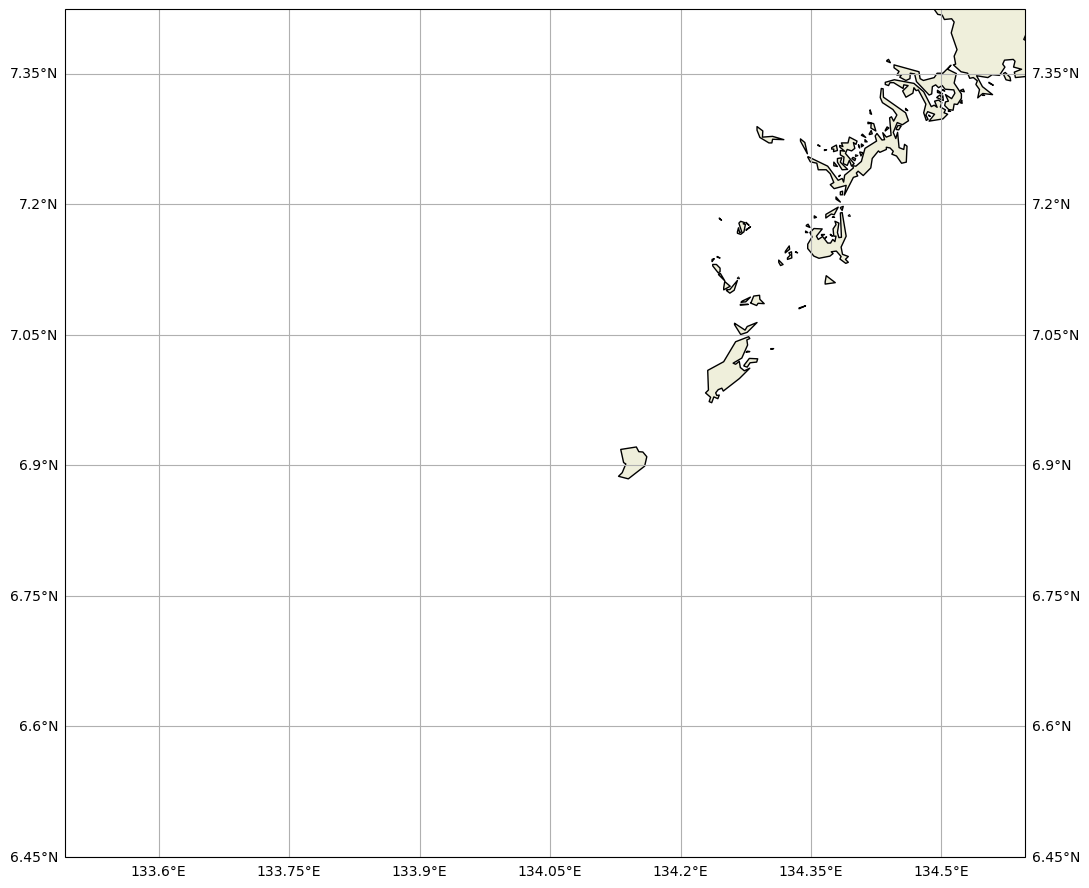

16:41:39 INFO    opendrift.models.basemodel:2996: Time to make animation: 0:00:06.855330


In [2]:
o.animation()